In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.04521504 0.00919837 0.02396874 ... 0.01006867 0.02748597 0.04087722]
 [0.60221012 0.12251121 0.31923488 ... 0.13410259 0.36608019 0.54443551]
 [0.37980608 0.07726623 0.20133728 ... 0.08457676 0.23088201 0.34336839]
 ...
 [0.41198206 0.08381198 0.21839394 ... 0.09174183 0.25044161 0.37245748]
 [0.2317114  0.04713844 0.12283148 ... 0.05159843 0.14085607 0.20948156]
 [0.67443461 0.13720427 0.35752148 ... 0.15018583 0.40998506 0.60973095]]

Noisy Matrix (with Homoscedastic Noise):
[[-4.09088626e-02  7.94633548e-02 -3.03957591e-02 ... -9.11885466e-02
  -8.14544341e-02  6.72577378e-04]
 [ 6.10968751e-01  1.01369049e-01  2.51725346e-01 ...  3.09142288e-01
   2.36906745e-01  4.61541915e-01]
 [ 4.57977949e-01  2.27368316e-01  3.53485984e-01 ...  1.50532379e-01
   1.01666789e-01  4.52389629e-01]
 ...
 [ 3.88909087e-01  1.92568077e-02  3.22448467e-01 ...  1.29734480e-01
   2.91313724e-01  4.51811405e-01]
 [ 2.83520392e-01  2.37220946e-02  2.91931006e-01 ... -2.1

In [ ]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

ModuleNotFoundError: No module named 'cEBMF'

In [ ]:
mycebmf= cEBMF(data= noisy_matrix,
               prior_L= "point_Laplace",
                 prior_F= "point_Laplace")
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [ ]:
K = np.min([K, U.shape[1]])
print(K)

5


In [ ]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


[ 0.25558478  0.2346211  -0.09600833 -0.00178348  0.21120599 -0.15825467
  0.1509814  -0.08469611 -0.21549498 -0.20091255  0.139813    0.01825137
 -0.17943403 -0.01635445  0.26821056  0.02055808 -0.1654388   0.19263768
 -0.08220022  0.25112456  0.19555455 -0.23500456 -0.0084195   0.25039378
 -0.33690083  0.13132198  0.05340468 -0.21986634  0.04149404  0.22689211
 -0.07608175  0.23065153 -0.23682033  0.16600463 -0.43937635 -0.10636298
 -0.09018472 -0.18673863 -0.1107197   0.14136845  0.02784075 -0.04379014
 -0.1817274  -0.10302508 -0.2269436  -0.39189473  0.09222078  0.2122938
 -0.30002138  0.15370582]
[-0.07486797 -0.08588185 -0.30470878  0.16545503  0.04190612 -0.04332
  0.02276009  0.33797047 -0.02023443 -0.29564944 -0.2920743   0.00130815
  0.12762184  0.17667647  0.28756317  0.05956745  0.08738893  0.01928
 -0.06086259  0.18334311  0.13188893  0.12248392 -0.07793006  0.09387815
  0.04258717 -0.05615397 -0.24405119  0.09162966  0.13902494  0.03456667
 -0.25697428 -0.05437173 -0.2933

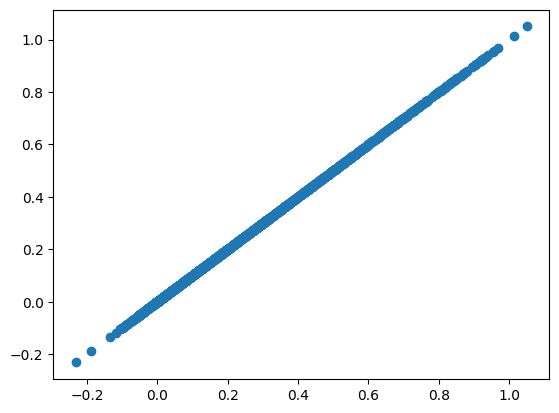

In [ ]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

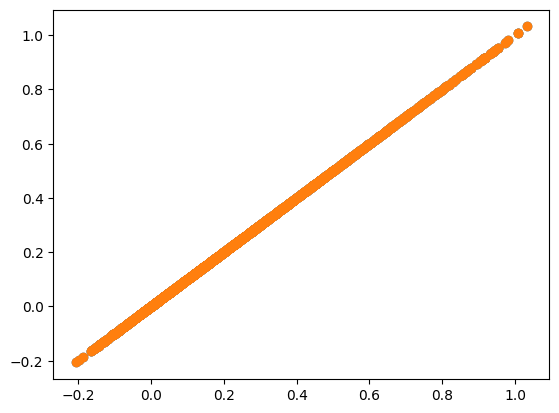

In [ ]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [ ]:
mycebmf.update_tau()
mycebmf.tau

array([[149.41692, 149.41692, 149.41692, ..., 149.41692, 149.41692,
        149.41692],
       [149.41692, 149.41692, 149.41692, ..., 149.41692, 149.41692,
        149.41692],
       [149.41692, 149.41692, 149.41692, ..., 149.41692, 149.41692,
        149.41692],
       ...,
       [149.41692, 149.41692, 149.41692, ..., 149.41692, 149.41692,
        149.41692],
       [149.41692, 149.41692, 149.41692, ..., 149.41692, 149.41692,
        149.41692],
       [149.41692, 149.41692, 149.41692, ..., 149.41692, 149.41692,
        149.41692]], shape=(50, 40), dtype=float32)

In [ ]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

<function prior_point_laplace at 0x000001791F70BD00>


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:112: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(lm2 - lm1))


In [ ]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
fhat , s_f  = compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
ebnm_obj = ebnm_point_laplace_solver(x  = fhat, 
                          s= s_f  
                         ) 
ebnm_obj

In [ ]:
ebnm_obj.post_mean
 

array([-1.10115741, -0.3232652 , -0.49691604, -0.14028877, -1.2441139 ,
       -0.26447744, -0.79779528, -0.43960456, -1.38650248, -0.36909683,
       -0.4014763 , -1.42544578, -0.82770852, -0.63837544, -0.088489  ,
       -1.44393704, -1.12216602, -0.60990075, -1.02154074, -1.32289169,
       -0.56212674, -1.11437843, -0.35606633, -0.45226721, -1.01881395,
       -1.52241311, -0.24412995, -0.96482096, -0.73270593, -0.08263497,
       -1.4014592 , -0.88291959, -0.55117623, -0.40427272, -0.0266039 ,
       -0.46024872, -1.36366806, -0.29476918, -1.1168159 , -0.56237272])

D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:315: RuntimeWarning: divide by zero encountered in log
  llik = logscale_add(np.log(1 - w) + lf, np.log(w) + lg)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  lgleft = np.log(a / 2) + s**2 * a**2 / 2 + a * (x - mu) + lpnormleft
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:309: RuntimeWarning: divide by zero encountered in log
  lgright = np.log(a / 2) + s**2 * a**2 / 2 - a * (x - mu) + lpnormright
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:268: RuntimeWarning: invalid value encountered in subtract
  return max_log + np.log(np.exp(logx - max_log) + np.exp(logy - max_log))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:337: RuntimeWarning: divide by zero encountered in sca

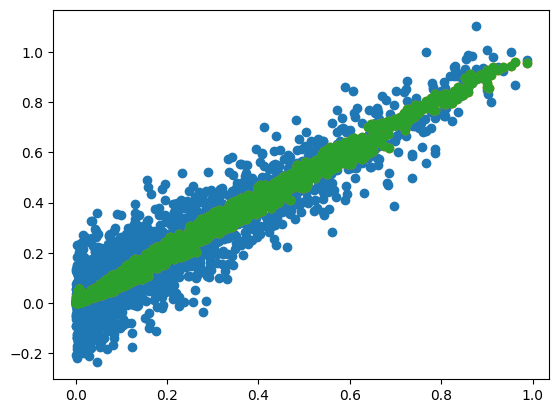

In [ ]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


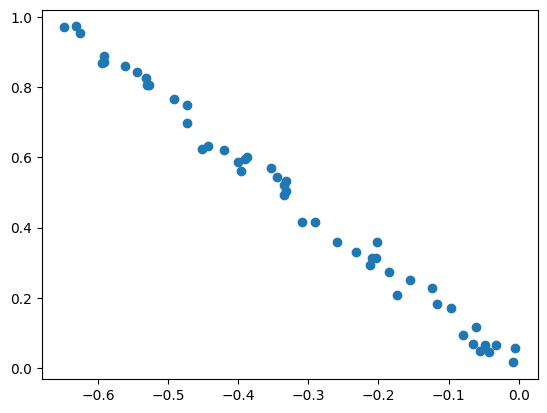

In [ ]:
plt.scatter(mycebmf.L[:,0], u)

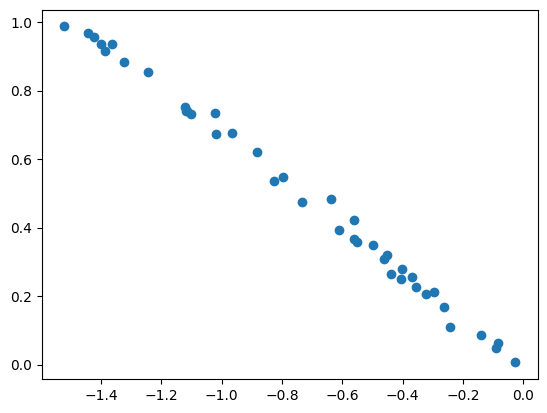

In [ ]:
plt.scatter(mycebmf.F[:,0], v)

In [ ]:
mycebmf.L[:,1]

array([ 3.2801188e-03,  2.9878458e-03, -1.1813935e-03, -2.1154547e-05,
        2.6690366e-03, -1.9700672e-03,  1.8768443e-03, -1.0401270e-03,
       -2.7257563e-03, -2.5296635e-03,  1.7341353e-03,  2.2374259e-04,
       -2.2459694e-03, -1.9933554e-04,  3.4596287e-03,  2.5163000e-04,
       -2.0632374e-03,  2.4206466e-03, -1.0094593e-03,  3.2174105e-03,
        2.4595282e-03, -2.9921466e-03, -1.0226721e-04,  3.2073357e-03,
       -4.4858591e-03,  1.6260034e-03,  6.5420946e-04, -2.7853670e-03,
        5.0786912e-04,  2.8818257e-03, -9.3350519e-04,  2.9330538e-03,
       -3.0176640e-03,  2.0711496e-03, -6.2284698e-03, -1.3108475e-03,
       -1.1088862e-03, -2.3414034e-03, -1.3653379e-03,  1.7540908e-03,
        3.4116415e-04, -5.3554837e-04, -2.2756190e-03, -1.2687066e-03,
       -2.8819807e-03, -5.3839297e-03,  1.1347334e-03,  2.6835743e-03,
       -3.9223675e-03,  1.9122009e-03], dtype=float32)

In [ ]:
for i in range(40):
    mycebmf.iter()

D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:334: RuntimeWarning: overflow encountered in exp
  dlogpnorm_left = -np.exp(-np.log(2 * np.pi) / 2 - xleft**2 / 2 - lpnormleft)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:335: RuntimeWarning: overflow encountered in exp
  dlogpnorm_right = np.exp(-np.log(2 * np.pi) / 2 - xright**2 / 2 - lpnormright)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:337: RuntimeWarning: invalid value encountered in multiply
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a * s**2 + (x - mu) + s * dlogpnorm_left)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.py:338: RuntimeWarning: invalid value encountered in multiply
  dgright_da = np.exp(lgright - llik) * (1 / a + a * s**2 - (x - mu) - s * dlogpnorm_right)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver\ebnm_point_laplace.p

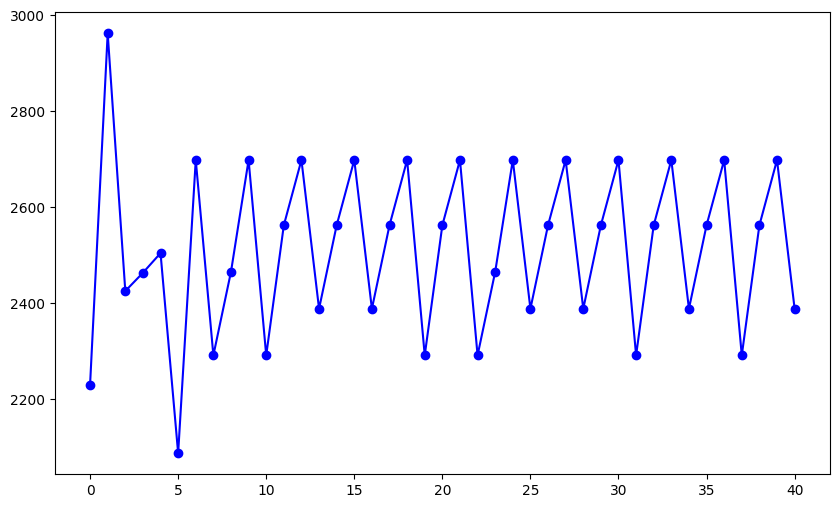

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

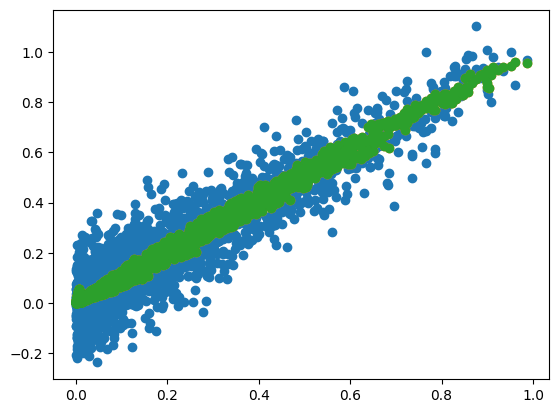

In [ ]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix) 
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [ ]:
mycebmf.L
 

array([[-0.17310017,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.2091568 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.04759527,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.5901066 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.5304715 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.2894729 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.12284459,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.4907274 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.47229585,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.52595603,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.3871662 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.5605154 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.05509841,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.54412663,  0.        ,  0. 